# Random Forest Classifier

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Dataset Description

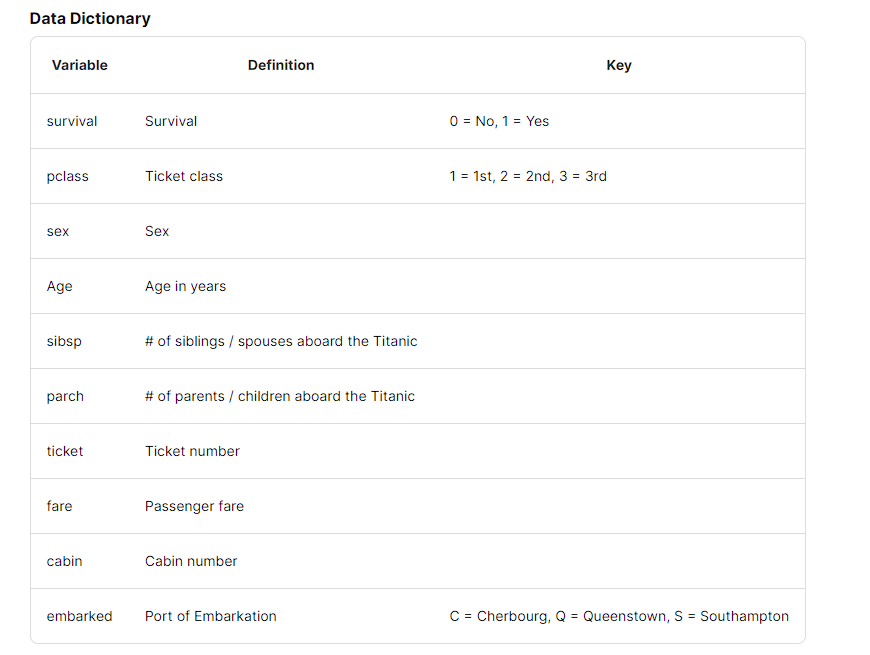

### Import the data

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Check missing values

In [4]:
s = df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Seperate X and Y

In [5]:
X = df.drop(labels=['PassengerId','Survived','Name'],axis=1)
Y = df[['Survived']]

In [6]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

### Cat con seperation for X

In [7]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [8]:
cat

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [9]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [10]:
cat1 = ['Cabin']
cat2 = ['Sex','Ticket','Embarked']

In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Build Sklearn Pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
# Numeric Pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Cat Pipe 1 for imputing Uknown value in Cabin column
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvailable')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Cat Pipe 2 for most frequent strategy
cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Combine Columns with Column Transformer
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [14]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [15]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Cabin_A10', 'cat1__Cabin_A14', 'cat1__Cabin_A16',
       'cat1__Cabin_A19', 'cat1__Cabin_A20', 'cat1__Cabin_A23',
       'cat1__Cabin_A24', 'cat1__Cabin_A26', 'cat1__Cabin_A31',
       'cat1__Cabin_A32', 'cat1__Cabin_A34', 'cat1__Cabin_A36',
       'cat1__Cabin_A5', 'cat1__Cabin_A6', 'cat1__Cabin_A7',
       'cat1__Cabin_B101', 'cat1__Cabin_B102', 'cat1__Cabin_B18',
       'cat1__Cabin_B19', 'cat1__Cabin_B20', 'cat1__Cabin_B22',
       'cat1__Cabin_B28', 'cat1__Cabin_B3', 'cat1__Cabin_B30',
       'cat1__Cabin_B35', 'cat1__Cabin_B37', 'cat1__Cabin_B38',
       'cat1__Cabin_B39', 'cat1__Cabin_B4', 'cat1__Cabin_B41',
       'cat1__Cabin_B42', 'cat1__Cabin_B49', 'cat1__Cabin_B5',
       'cat1__Cabin_B50', 'cat1__Cabin_B51 B53 B55',
       'cat1__Cabin_B57 B59 B63 B66', 'cat1__Cabin_B58 B60',
       'cat1__Cabin_B69', 'cat1__Cabin_B71', 'cat1__Cabin_B73',
       'cat1__Cabin_B77', 'cat1__Cabin_B78', 'c

In [16]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,...,cat2__Ticket_W./C. 14263,cat2__Ticket_W./C. 6607,cat2__Ticket_W./C. 6608,cat2__Ticket_W./C. 6609,cat2__Ticket_W.E.P. 5734,cat2__Ticket_W/C 14208,cat2__Ticket_WE/P 5735,cat2__Embarked_C,cat2__Embarked_Q,cat2__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [18]:
xtrain.shape

(712, 839)

In [19]:
xtest.shape

(179, 839)

### Build base Random Forest model

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2,criterion='gini',random_state=42)
model.fit(xtrain,ytrain)


RandomForestClassifier(max_depth=2, random_state=42)

In [21]:
# Training Accuracy
model.score(xtrain,ytrain)

0.6278089887640449

In [22]:
# Testing accuracy
model.score(xtest,ytest)

0.5865921787709497

### Hyperparameter tuning

In [23]:
params = {'n_estimators':[2,5,10,15,20,25],
          'max_depth':[3,4,5,6,7,8,9,10],
          'criterion':['gini','entropy']}

In [24]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
gscv = GridSearchCV(rfc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [2, 5, 10, 15, 20, 25]},
             scoring='f1_macro')

In [25]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 20}

In [26]:
gscv.best_score_

0.7725579782816088

In [27]:
best_rfc = gscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=20)

In [28]:
# Accuracy in training
best_rfc.score(xtrain,ytrain)

0.8061797752808989

In [29]:
# Accuracy in testing
best_rfc.score(xtest,ytest)

0.770949720670391

# Predict training and testing data

In [34]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [38]:
ypred_tr[0:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [39]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [37]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[105,   0],
       [ 41,  33]], dtype=int64)

### Visualize confusion matrix

<Axes: >

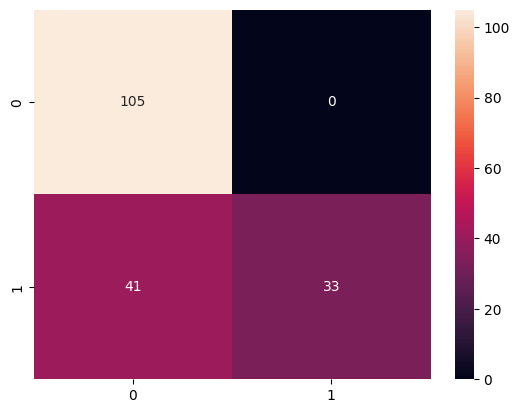

In [40]:
import seaborn as sns
sns.heatmap(cf,annot=True, fmt='d')

## Print classification report

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       105
           1       1.00      0.45      0.62        74

    accuracy                           0.77       179
   macro avg       0.86      0.72      0.73       179
weighted avg       0.84      0.77      0.75       179



### Predictions on testing set

In [43]:
df2 = pd.read_csv('test_titanic.csv')
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
xnew = pre.transform(df2).toarray()
xnew

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  1.        ,
         0.        ,  0.        ]])

In [46]:
xnew = pd.DataFrame(xnew, columns=cols)
xnew.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,...,cat2__Ticket_W./C. 14263,cat2__Ticket_W./C. 6607,cat2__Ticket_W./C. 6608,cat2__Ticket_W./C. 6609,cat2__Ticket_W.E.P. 5734,cat2__Ticket_W/C 14208,cat2__Ticket_WE/P 5735,cat2__Embarked_C,cat2__Embarked_Q,cat2__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
preds = best_rfc.predict(xnew)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Saving in dataframe

In [49]:
df2['Survived_pred']=preds

In [50]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_pred
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [52]:
df2['Survived_pred'].value_counts()

Survived_pred
0    346
1     72
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

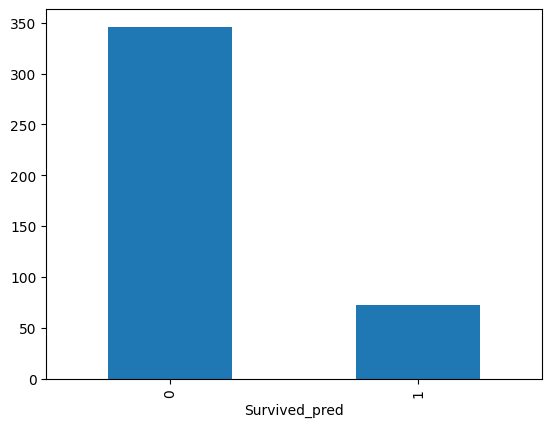

In [53]:
df2['Survived_pred'].value_counts().plot(kind='bar')

In [54]:
df2.to_csv('predictions.csv',index=False)